# Вариант 3

Обязательные требования:
1. Все графики должны быть подписаны (заголовок, оси)
2. К каждому графику должны быть представлены выводы (что вы увидели, какие зависимости, какие особенности, что тот или иной график говорит вам о данных).
3. Графики должны быть читабельными (если сделаете такой масштаб, что ничего не будет видно или все будет налазить друг на друга - это не засчитывается).

## Загрузка данных

Вам дан датасет о ценах на жильев с характеристиками этого жилья: `sales_dataset.csv`.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/Adelaaas/Data_science_basic_24_25_group_2/refs/heads/main/home_work_EDA/sales_dataset.csv")

## График 1

Построить точечный график зависимости переменной `Area_in_Marla` от `price` с учётом третей переменной `purpose`.

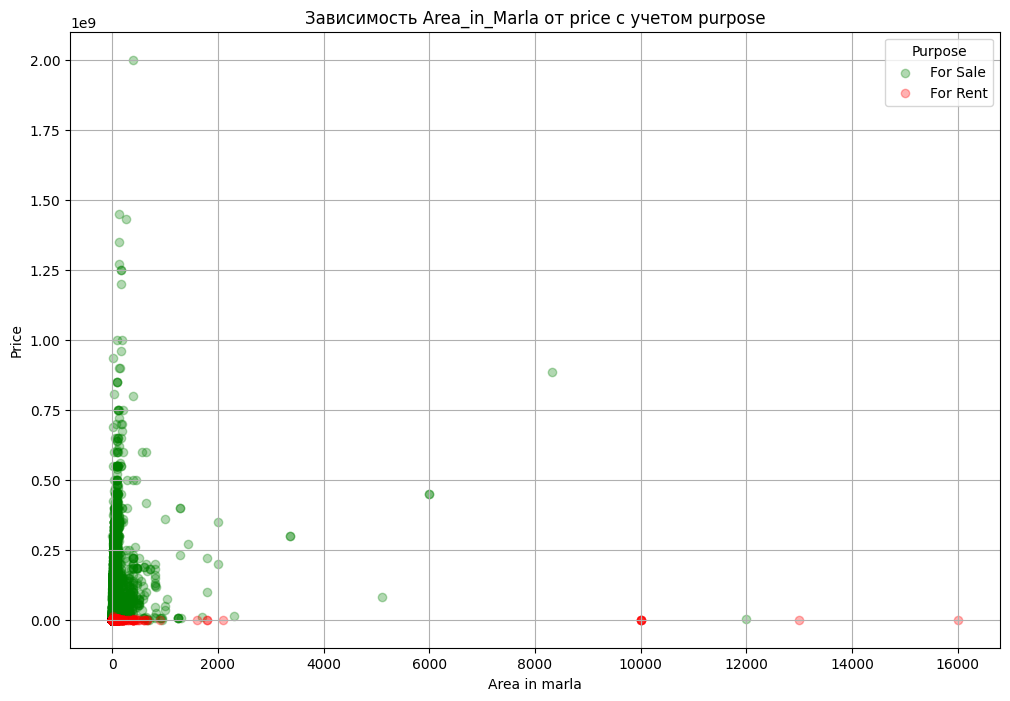

In [ ]:
colors = {'For Sale': 'green', 'For Rent': 'red'}
plt.figure(figsize=(12, 8))
for purpose in df['purpose'].unique():
    filtered = df[df['purpose'] == purpose]
    plt.scatter(filtered['Area_in_Marla'], filtered['price'], color=colors[purpose], label=purpose, alpha=0.3)
plt.title('Зависимость Area_in_Marla от price с учетом purpose')
plt.xlabel('Area in marla')
plt.ylabel('Price')
plt.legend(title='Purpose')
plt.grid(which='both')
plt.show()

## График 2

Постройте 4 графика на одной фигуре, как расположить координатные плоскости - это на ваше усмотрение.

Это должны быть гистограммы для следующих переменных:
- `property_type`
- `city`
- `purpose`
- `bedrooms`

Каждый график должен быть своего цвета, также задайте цвет отличный от белого для бекграунда всей фигуры.

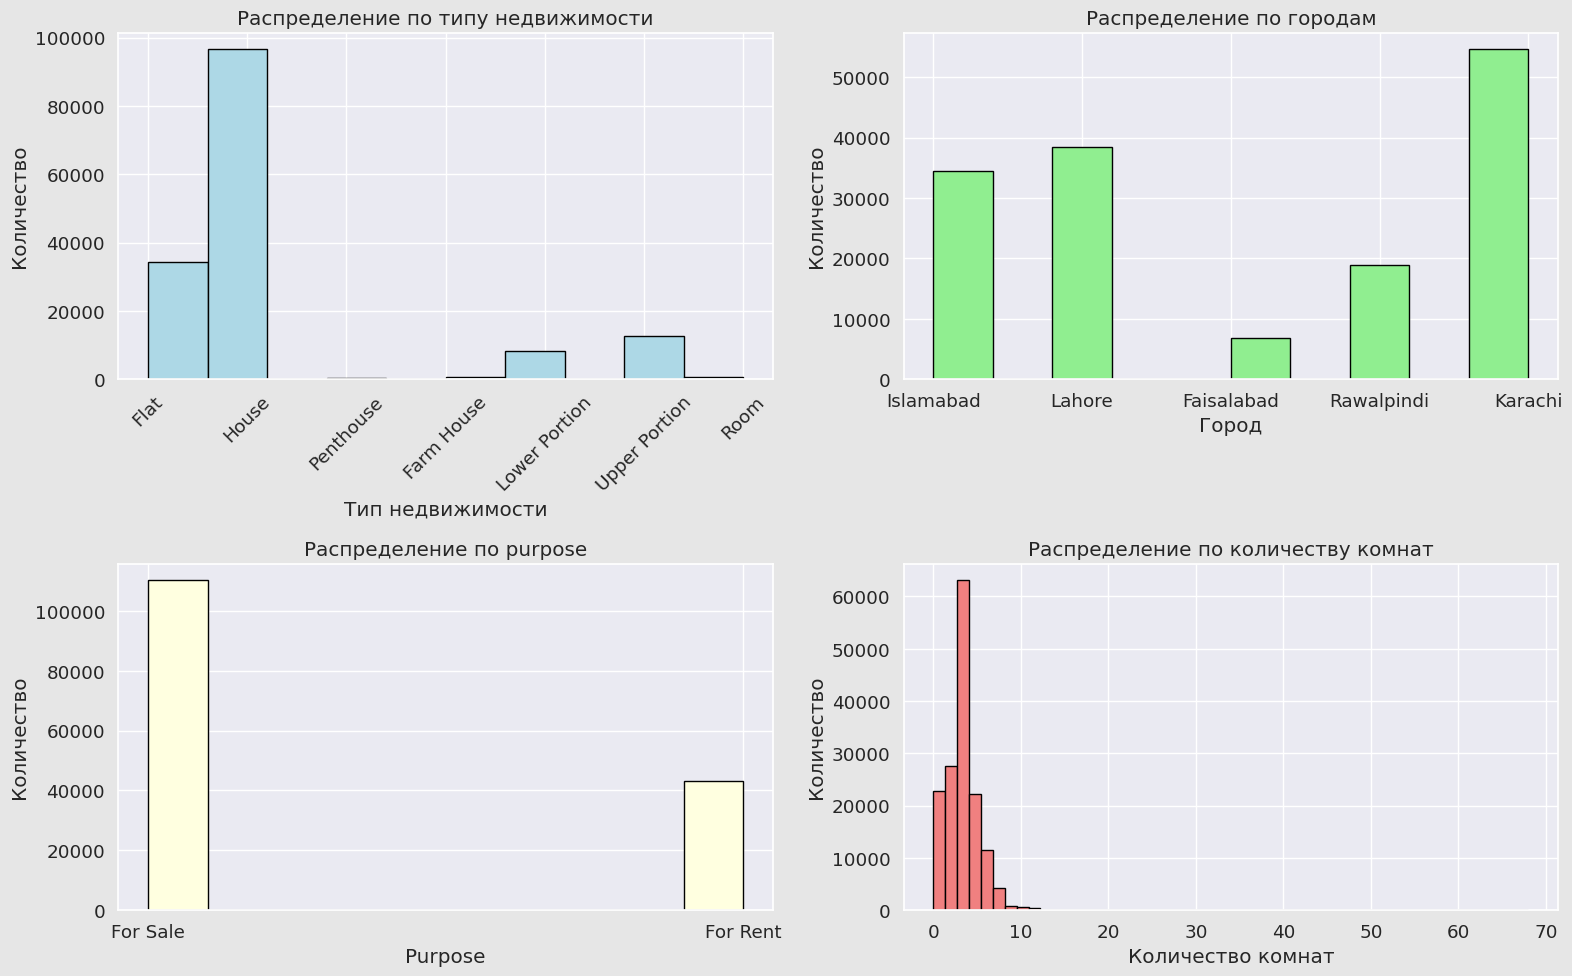

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.patch.set_facecolor('#e6e6e6')

axes[0, 0].hist(df['property_type'], color='lightblue', edgecolor='black')
axes[0, 0].set_title('Распределение по типу недвижимости')
axes[0, 0].set_xlabel('Тип недвижимости')
axes[0, 0].set_ylabel('Количество')
axes[0, 0].tick_params(axis='x', labelrotation=45)

axes[0, 1].hist(df['city'], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Распределение по городам')
axes[0, 1].set_xlabel('Город')
axes[0, 1].set_ylabel('Количество')

axes[1, 0].hist(df['purpose'], color='lightyellow', edgecolor='black')
axes[1, 0].set_title('Распределение по purpose')
axes[1, 0].set_xlabel('Purpose')
axes[1, 0].set_ylabel('Количество')

axes[1, 1].hist(df['bedrooms'], color='lightcoral', edgecolor='black',bins=50)
axes[1, 1].set_title('Распределение по количеству комнат')
axes[1, 1].set_xlabel('Количество комнат')
axes[1, 1].set_ylabel('Количество')

plt.tight_layout()
plt.show()


In [ ]:
df['bedrooms'].value_counts()

,count
bedrooms,
3,41342
2,27668
5,22209
4,21764
0,18879
6,11440
1,3978
7,2875
8,1431


## График 3

Визуализируйте матрицу корреляции в виде heatmap.

Все должно быть ЧИТАБЕЛЬНО!

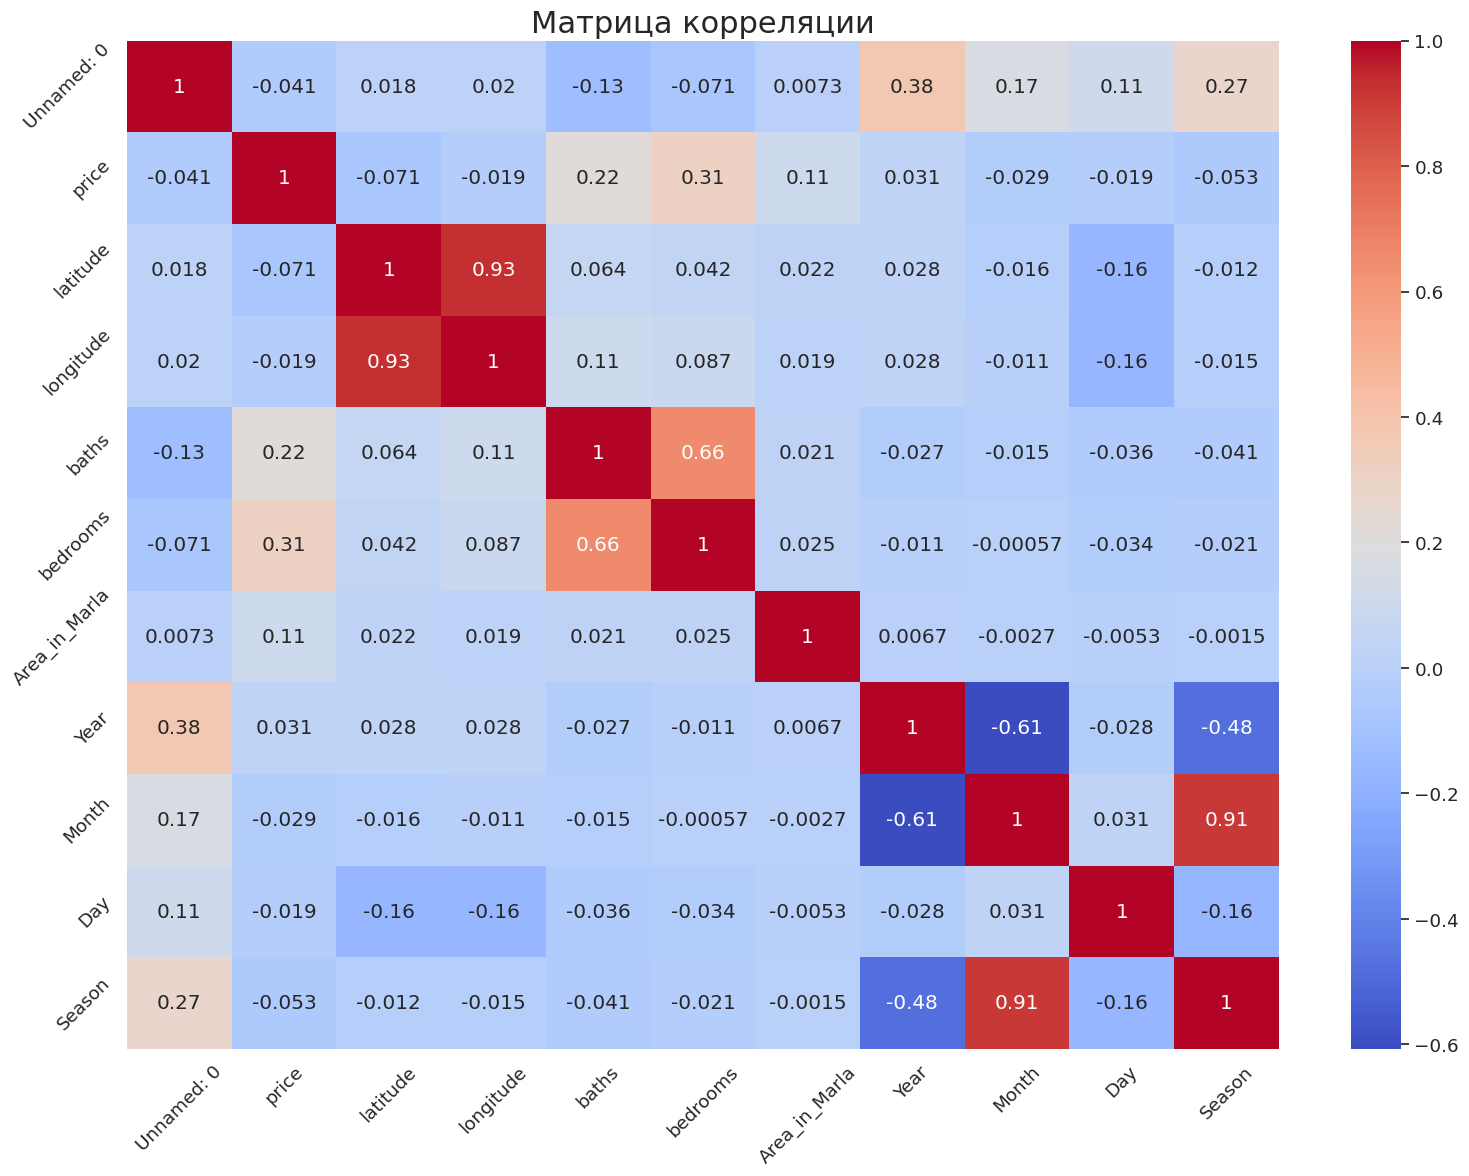

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции', fontsize=22)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## График 4

Постройте графики boxplot для следующих переменных:
- `price` с учетом переменной `purpose`
- `bedrooms` с учетом переменной `purpose`

Как их построить решаете самостоятельно.

Проанализируйте выборы.

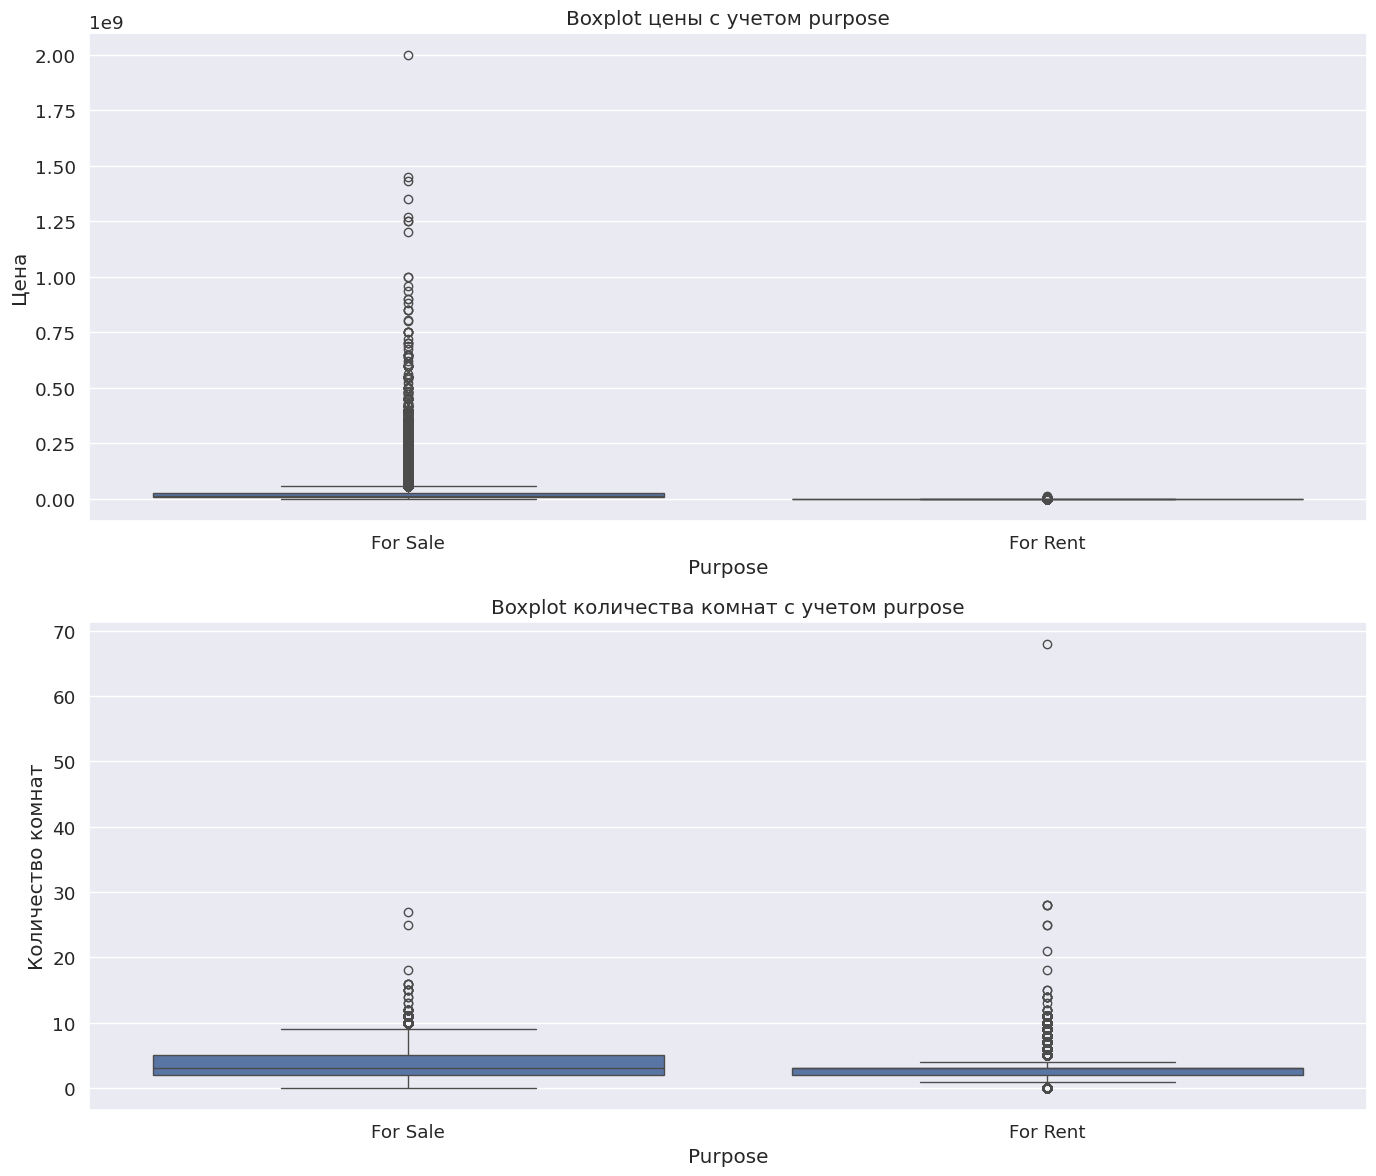

In [ ]:
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)
sns.boxplot(x='purpose', y='price', data=df)
plt.title('Boxplot цены с учетом purpose')
plt.xlabel('Purpose')
plt.ylabel('Цена')
plt.subplot(2, 1, 2)
sns.boxplot(x='purpose', y='bedrooms', data=df)
plt.title('Boxplot количества комнат с учетом purpose')
plt.xlabel('Purpose')
plt.ylabel('Количество комнат')
plt.tight_layout()
plt.show()

## График 5

Постройте heatmap для отображения пропусков в данных.

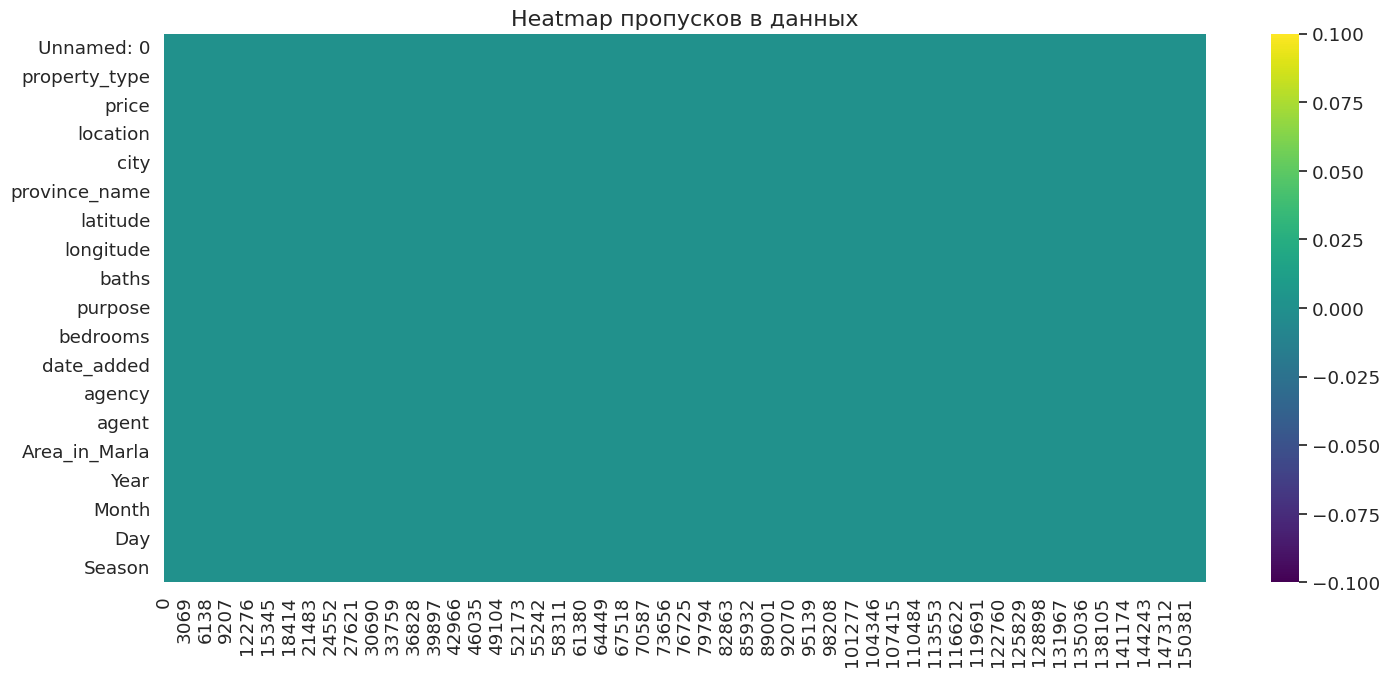

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.isna().transpose(), cmap='viridis')
plt.title('Heatmap пропусков в данных', fontsize=16)
plt.tight_layout()
plt.show()

## График 6

Постройте график среднего значения переменной `price` в зависимости от переменной `Season`.

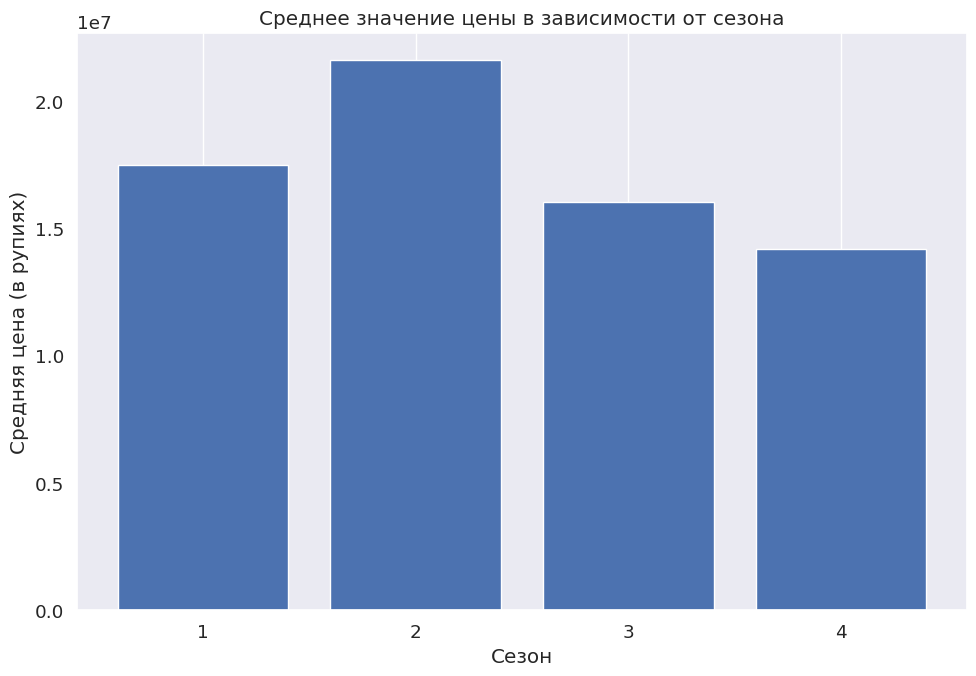

In [ ]:
avg_price_by_season = (df.groupby('Season')['price']
                       .mean().reset_index())
plt.figure(figsize=(10, 7))
plt.bar(avg_price_by_season['Season'], avg_price_by_season['price'])
plt.title('Среднее значение цены в зависимости от сезона')
plt.xlabel('Сезон')
plt.ylabel('Средняя цена (в рупиях)')
plt.xticks(avg_price_by_season['Season'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## График 7

Найдите любой **нестандартный** график и постройте его. На ваш выбор.

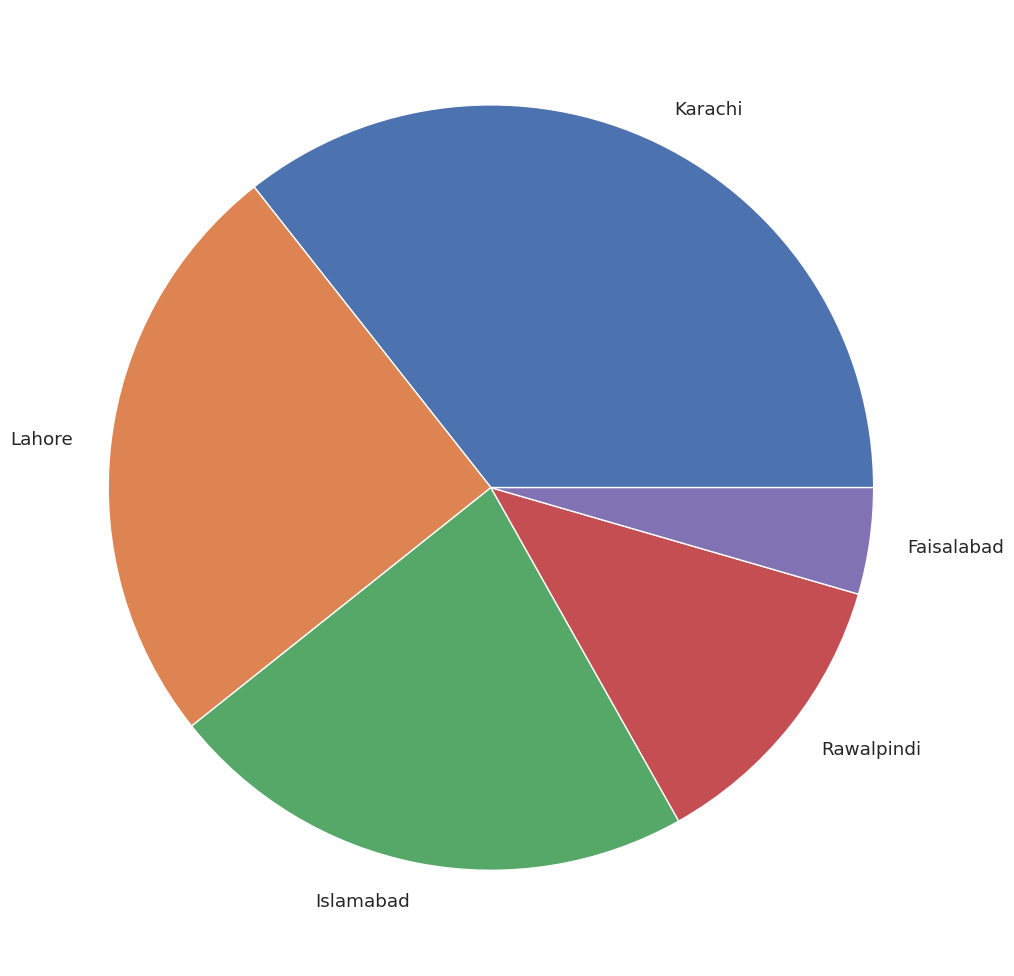

In [ ]:
plt.figure(figsize=(12, 10))
plt.pie(df['city'].value_counts(), labels=df['city'].value_counts().index)
plt.tight_layout()
plt.show()